<a href="https://colab.research.google.com/github/dtype2100/TIL/blob/master/golden_cross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install finance-datareader

In [ ]:
pip install plotly

In [ ]:
!apt-get update -qq

In [ ]:
!apt-get install fonts-nanum* -qq

# 환경설정

In [ ]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
sns.set()
%matplotlib inline
plt.rcParams['font.family'] = 'Hancom Gothic'
# plt.rc('font', family='NanumGothic')
rcParams['font.family'] = 'Malgun Gothic'
rcParams['font.size'] = 20
rcParams['axes.unicode_minus'] = False 

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Final/stock_data/samsung")

# 데이터 준비

In [ ]:
sp_data_dict = dict()
path = '/content/drive/MyDrive/Colab Notebooks/Final/stock_data/samsung/'

for file_name in os.listdir(path):
    sp_data = pd.read_csv(path + file_name, parse_dates = ['Date'])
    stock_name = file_name.replace('.csv', '')
    sp_data_dict[stock_name] = sp_data

# 이동 평균 계산

In [ ]:
for stock_name in sp_data_dict.keys():
    # 이동 평균 계산
    sp_data = sp_data_dict[stock_name]
    sp_data['MA_5'] = sp_data['Close'].rolling(5).mean()
    sp_data['MA_20'] = sp_data['Close'].rolling(20).mean()
    sp_data['MA_60'] = sp_data['Close'].rolling(60).mean()
    sp_data['MA_120'] = sp_data['Close'].rolling(120).mean()
    sp_data.dropna(inplace = True)

# 골든 크로스, 데드 크로스 변수 추가

In [ ]:
import itertools
import numpy as np

for stock_name in sp_data_dict.keys():
    sp_data = sp_data_dict[stock_name]
    for cross, st, lt in itertools.product(['G', 'D'], [5, 20], [60, 120]):
        output_col = "{}_{}_{}".format(cross, st, lt)
        st_col = "MA_" + str(st)
        lt_col = "MA_" + str(lt)
        st_data = sp_data[st_col].values
        lt_data = sp_data[lt_col].values
        if cross == "G":
            output = (st_data[1:] >= lt_data[1:]) & (st_data[:-1] < lt_data[:-1])
        elif cross == "D":
            output = (st_data[1:] < lt_data[1:]) & (st_data[:-1] >= lt_data[:-1])
        output = np.insert(output, 0, False)
        sp_data[output_col] = output

In [ ]:
stock_name

'samsung'

# 이동 평균선과 골든/데드 크로스 시각화

In [ ]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 

In [ ]:
font_location = '/content/drive/MyDrive/Colab Notebooks/Final/stock_data/DejaVuSans.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
%matplotlib inline

In [ ]:
plt.rcParams['font.family'] = 'Hancom Gothic'


Text(0.5, 0, '날짜')

findfont: Font family ['Hancom Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hancom Gothic'] not found. Falling back to DejaVu Sans.


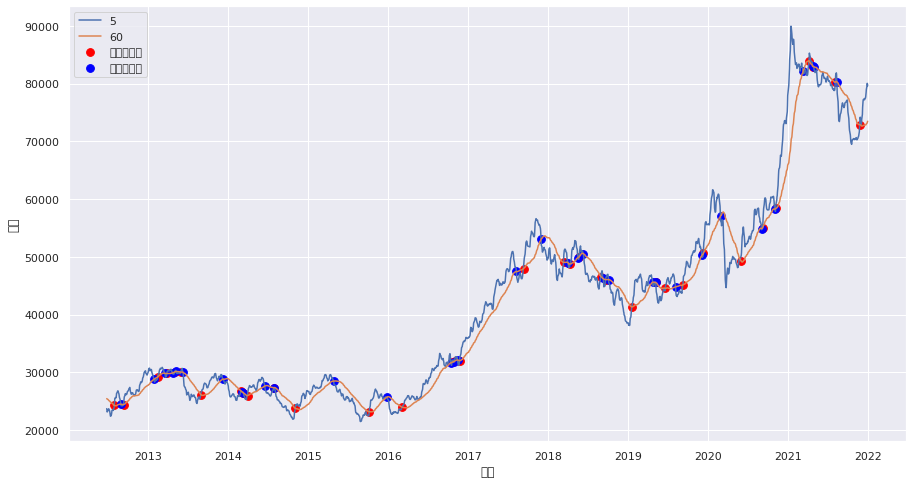

In [ ]:
plt.figure(figsize = (15, 8))
samsung = sp_data_dict['samsung']
plt.plot(samsung['Date'], samsung['MA_5'], label = "5")
plt.plot(samsung['Date'], samsung['MA_60'], label = "60")

golden_cross_data = samsung.loc[samsung['G_5_60']]
dead_cross_data = samsung.loc[samsung['D_5_60']]

plt.scatter(golden_cross_data['Date'], golden_cross_data['MA_60'],
            label = "골든크로스", color = "red", s = 60)
plt.scatter(dead_cross_data['Date'], dead_cross_data['MA_60'],
            label = "데드크로스", color = "blue", s = 60)
plt.legend()
plt.ylabel("주가")
plt.xlabel("날짜")